In [1]:
pip install  fredapi

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

plt.style.use('fivethirtyeight')
pd.set_option('display.max_columns', 500)
color_pal = plt.rcParams['axes.prop_cycle'].by_key()['color']

from fredapi import Fred

In [3]:
api_file = "C:/Users/lenyn/OneDrive/Desktop/PortfolioProjects/Economic_Data_Analysis_Project/Fred_API_Key.txt"
with open(api_file, 'r') as file: 
    fred_key = file.read()

# 1. Create The Fred Object 

In [4]:
fred = Fred(api_key=fred_key)
fred

# 2. Search for Economic Data

In [5]:
sp_search = fred.search('S&P', order_by='popularity')

In [6]:
sp_search.head()

,id,realtime_start,realtime_end,title,observation_start,observation_end,frequency,frequency_short,units,units_short,seasonal_adjustment,seasonal_adjustment_short,last_updated,popularity,notes
series id,,,,,,,,,,,,,,,
BAMLH0A0HYM2,BAMLH0A0HYM2,2025-10-26,2025-10-26,ICE BofA US High Yield Index Option-Adjusted S...,1996-12-31,2025-10-23,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-10-24 09:11:52-05:00,99,The ICE BofA Option-Adjusted Spreads (OASs) ar...
SP500,SP500,2025-10-26,2025-10-26,S&P 500,2015-10-26,2025-10-24,"Daily, Close",D,Index,Index,Not Seasonally Adjusted,NSA,2025-10-24 19:01:58-05:00,92,The observations for the S&P 500 represent the...
CSUSHPINSA,CSUSHPINSA,2025-10-26,2025-10-26,S&P CoreLogic Case-Shiller U.S. National Home ...,1987-01-01,2025-07-01,Monthly,M,Index Jan 2000=100,Index Jan 2000=100,Not Seasonally Adjusted,NSA,2025-09-30 08:11:02-05:00,86,"For more information regarding the index, plea..."
BAMLH0A0HYM2EY,BAMLH0A0HYM2EY,2025-10-26,2025-10-26,ICE BofA US High Yield Index Effective Yield,1996-12-31,2025-10-23,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-10-24 09:11:56-05:00,86,This data represents the effective yield of th...
BAMLC0A0CM,BAMLC0A0CM,2025-10-26,2025-10-26,ICE BofA US Corporate Index Option-Adjusted Sp...,1996-12-31,2025-10-23,"Daily, Close",D,Percent,%,Not Seasonally Adjusted,NSA,2025-10-24 09:13:04-05:00,86,The ICE BofA Option-Adjusted Spreads (OASs) ar...


# 3. Pull Raw Data with Plotting

In [7]:
sp500 = fred.get_series(series_id='SP500')

<Axes: title={'center': 'S&P 500'}>

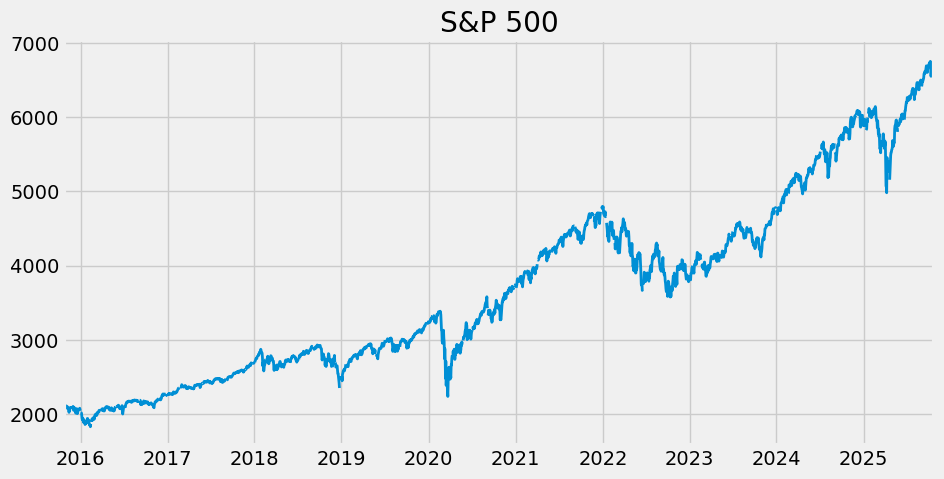

In [8]:
sp500.plot(figsize=(10, 5), title='S&P 500', lw=2)

# 4. Pull and Join Multiple Data Series

In [9]:
uemp_df = fred.search('unemployment rate state', filter=('frequency', 'Monthly'))
uemp_df = uemp_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')
uemp_df = uemp_df.loc[uemp_df['title'].str.contains('Unemployment Rate')]

In [10]:
all_results = []

for myid in uemp_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)

uemp_results = pd.concat(all_results, axis = 1)

In [11]:
uemp_states = uemp_results.drop('UNRATE', axis=1)

<Axes: >

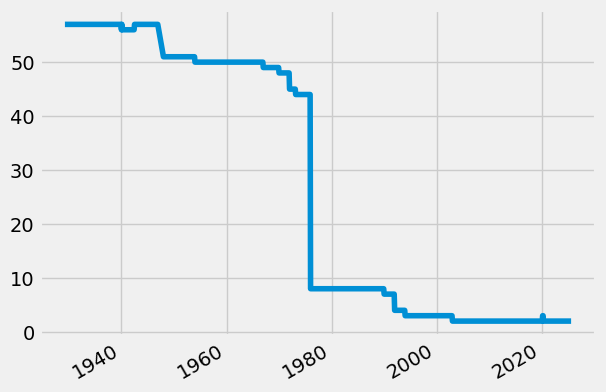

In [12]:
uemp_states.isna().sum(axis = 1).plot()

In [13]:
extra_cols = []
for cols in uemp_states.columns:
    if len(cols) > 4:
        extra_cols.append(cols)

extra_cols

['LNS14000006',
 'LNS14000024',
 'LNS14024887',
 'U2RATE',
 'M0892AUSM156SNBR',
 'LNS14000002',
 'M0892BUSM156SNBR',
 'LNS14000003',
 'LNS14027662',
 'LNS14027660',
 'LNS14000009',
 'LNS14000001',
 'LNS14000036',
 'LNS14000012',
 'LNS14000031',
 'LNS14027659',
 'LNS14000060',
 'LASMT261982000000003',
 'LNS14032183',
 'LASMT534266000000003',
 'LNS14000032',
 'LRUN64TTUSM156S']

In [14]:
uemp_states = uemp_states.drop(extra_cols, axis = 1)

In [15]:
uemp_states = uemp_states.dropna()

In [ ]:
id_to_state = uemp_df['title'].str.replace('Unemployment Rate in ', '').drop(extra_cols).drop('UNRATE').to_dict()
uemp_states.columns = [id_to_state[val] for val in uemp_states.columns]

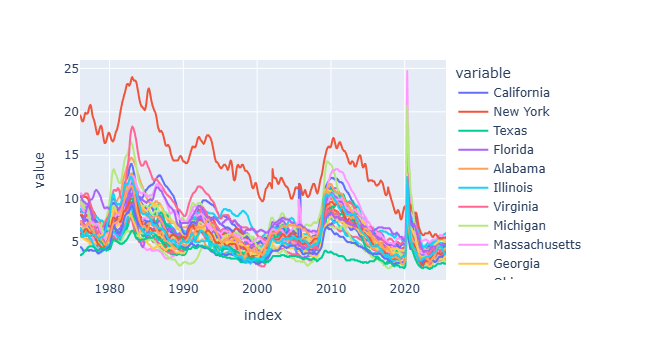

In [65]:
# Plot states Unemployment Rate
px.line(uemp_states)

## Pull May 2020 Unemployment Rate Per State

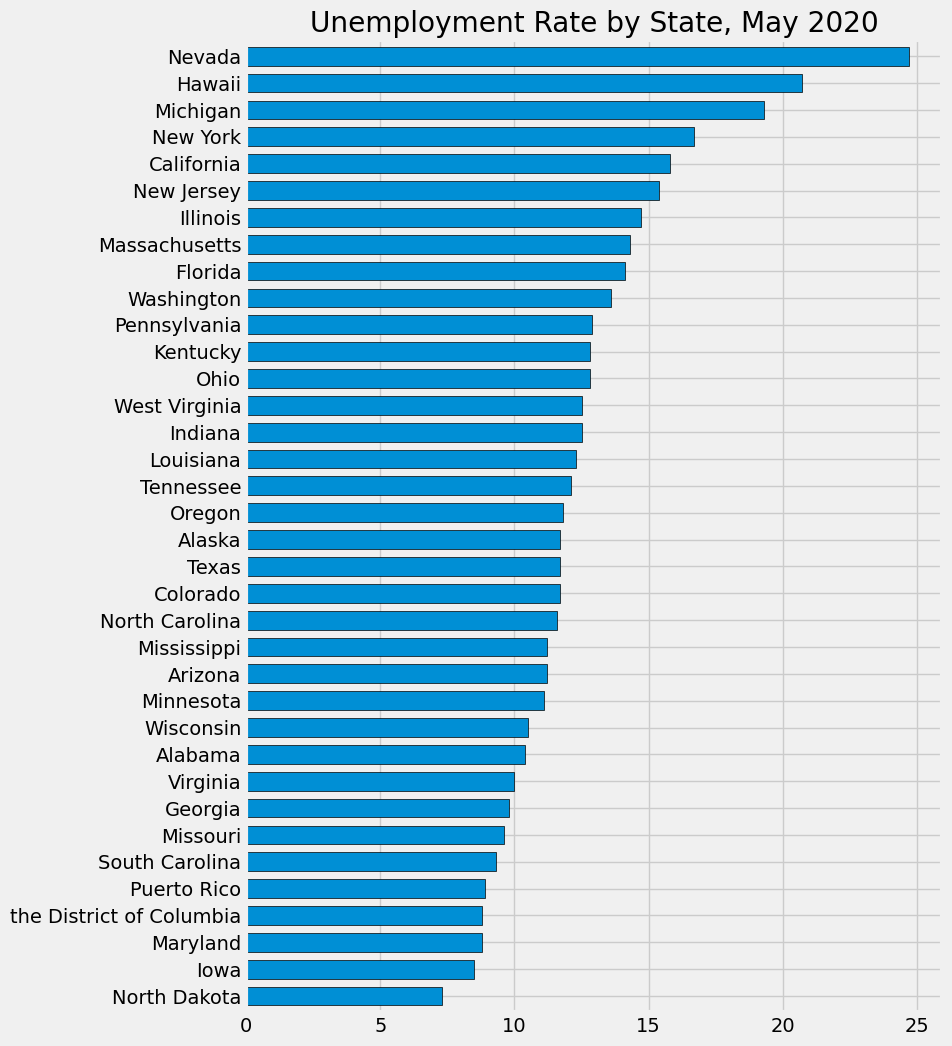

In [70]:
ax = uemp_states.loc[uemp_states.index == '2020-05-01'].T \
    .sort_values('2020-05-01') \
    .plot(kind='barh', figsize= (8, 12), width = 0.7, edgecolor = 'black', 
          title = 'Unemployment Rate by State, May 2020')
ax.legend().remove()
plt.show()

# Pull Participation Rate

In [71]:
part_df = fred.search('participation rate state', filter=('frequency', 'Monthly'))
part_df = part_df.query('seasonal_adjustment == "Seasonally Adjusted" and units == "Percent"')

In [86]:
extra_cols = [val for val in part_df.index if len(val) > 7]
extra_cols

['LNS11300060',
 'LNS11300002',
 'LNS11300001',
 'LNS11300012',
 'LNS11324230',
 'LRAC25MAUSM156S',
 'LRAC25FEUSM156S',
 'LNS11300036',
 'LNS11300006',
 'LNS11327662',
 'LNS11327660',
 'LNS11300028',
 'LNS11300032',
 'LNS11300009',
 'LNS11300031',
 'LRAC55TTUSM156S',
 'LNS11300003',
 'LNS11300029',
 'LNS11300026',
 'LNS11327659',
 'LNS11300025',
 'LNS11327689',
 'LRAC64TTUSM156S',
 'LNS11300015',
 'LRAC55MAUSM156S',
 'LRAC24FEUSM156S',
 'LRIN64TTUSM156S',
 'LNS11300018',
 'LRAC64FEUSM156S',
 'LRIN25MAUSM156S',
 'LRACTTFEUSM156S',
 'LRAC24TTUSM156S',
 'LRINTTTTUSM156S',
 'LRIN24MAUSM156S',
 'LRIN74MAUSM156S',
 'LRIN64FEUSM156S',
 'LRAC55FEUSM156S',
 'LRAC74TTUSM156S',
 'LRACTTTTUSM156S',
 'LRAC25TTUSM156S',
 'LRAC24MAUSM156S',
 'LRAC64MAUSM156S',
 'LRAC74FEUSM156S',
 'LRINTTMAUSM156S',
 'LRIN25FEUSM156S',
 'LRIN64MAUSM156S',
 'LRACTTMAUSM156S',
 'LRAC74MAUSM156S',
 'LRINTTFEUSM156S',
 'LRIN74TTUSM156S',
 'LRIN24TTUSM156S',
 'LRIN55TTUSM156S',
 'LRIN25TTUSM156S',
 'LRIN24FEUSM156S',
 'LR

In [95]:
part_id_to_state = part_df['title'].str.replace('Labor Force Participation Rate for', '').drop(extra_cols).drop('CIVPART').to_dict()
part_id_to_state

{'LBSSA06': ' California',
 'LBSSA01': ' Alabama',
 'LBSSA13': ' Georgia',
 'LBSSA48': ' Texas',
 'LBSSA28': ' Mississippi',
 'LBSSA42': ' Pennsylvania',
 'LBSSA12': ' Florida',
 'LBSSA22': ' Louisiana',
 'LBSSA17': ' Illinois',
 'LBSSA36': ' New York',
 'LBSSA51': ' Virginia',
 'LBSSA24': ' Maryland',
 'LBSSA26': ' Michigan',
 'LBSSA54': ' West Virginia',
 'LBSSA35': ' New Mexico',
 'LBSSA39': ' Ohio',
 'LBSSA25': ' Massachusetts',
 'LBSSA37': ' North Carolina',
 'LBSSA04': ' Arizona',
 'LBSSA21': ' Kentucky',
 'LBSSA05': ' Arkansas',
 'LBSSA15': ' Hawaii',
 'LBSSA08': ' Colorado',
 'LBSSA45': ' South Carolina',
 'LBSSA40': ' Oklahoma',
 'LBSSA27': ' Minnesota',
 'LBSSA47': ' Tennessee',
 'LBSSA53': ' Washington',
 'LBSSA19': ' Iowa',
 'LBSSA55': ' Wisconsin',
 'LBSSA29': ' Missouri',
 'LBSSA41': ' Oregon',
 'LBSSA32': ' Nevada',
 'LBSSA49': ' Utah',
 'LBSSA18': ' Indiana',
 'LBSSA46': ' South Dakota',
 'LBSSA34': ' New Jersey',
 'LBSSA11': ' District Of Columbia',
 'LBSSA02': ' Alask

In [98]:
all_results = []

for myid in part_df.index:
    results = fred.get_series(myid)
    results = results.to_frame(name=myid)
    all_results.append(results)

part_states = pd.concat(all_results, axis = 1).drop('CIVPART', axis=1)

In [108]:
part_states = part_states.drop(extra_cols, axis =1).dropna()


In [109]:
part_states.columns = [part_id_to_state[val] for val in part_states.columns]

In [110]:
part_states

,California,Alabama,Georgia,Texas,Mississippi,Pennsylvania,Florida,Louisiana,Illinois,New York,Virginia,Maryland,Michigan,West Virginia,New Mexico,Ohio,Massachusetts,North Carolina,Arizona,Kentucky,Arkansas,Hawaii,Colorado,South Carolina,Oklahoma,Minnesota,Tennessee,Washington,Iowa,Wisconsin,Missouri,Oregon,Nevada,Utah,Indiana,South Dakota,New Jersey,District Of Columbia,Alaska,Maine,New Hampshire,Wyoming,Idaho,Delaware,Kansas,Montana,North Dakota,Rhode Island,Connecticut,Nebraska,Vermont
1976-01-01,62.5,57.1,63.8,63.7,58.8,58.4,55.8,56.9,63.1,58.1,65.9,64.3,61.6,52.5,60.6,61.7,64.8,66.6,59.5,60.5,57.9,69.9,67.3,65.3,59.4,65.5,59.7,61.0,64.4,65.6,60.5,63.0,71.4,62.8,64.0,64.8,61.5,64.4,69.3,62.1,65.8,65.3,63.1,62.7,65.2,62.5,62.7,63.8,64.1,64.7,63.7
1976-02-01,62.4,56.9,63.6,63.5,58.6,58.3,55.6,56.7,63.0,58.0,65.7,64.1,61.5,52.4,60.4,61.6,64.7,66.4,59.2,60.3,57.8,69.7,67.1,65.2,59.3,65.4,59.5,60.8,64.3,65.5,60.4,62.8,70.8,62.6,63.9,64.7,61.4,64.5,68.6,61.9,65.6,65.0,62.9,62.6,65.1,62.4,62.5,63.7,64.0,64.6,63.5
1976-03-01,62.2,56.8,63.5,63.3,58.5,58.3,55.5,56.5,62.9,58.0,65.5,64.1,61.5,52.3,60.2,61.6,64.6,66.3,59.1,60.2,57.8,69.6,66.9,65.0,59.2,65.3,59.4,60.6,64.2,65.5,60.3,62.6,70.5,62.5,63.8,64.6,61.4,64.6,68.1,61.9,65.5,64.8,62.8,62.6,65.0,62.3,62.4,63.7,63.9,64.6,63.4
1976-04-01,62.2,56.8,63.6,63.4,58.5,58.3,55.4,56.5,62.9,58.0,65.4,64.1,61.6,52.3,60.1,61.6,64.6,66.3,59.1,60.2,57.7,69.4,66.7,64.9,59.1,65.3,59.3,60.7,64.1,65.5,60.4,62.5,70.5,62.5,63.8,64.6,61.5,64.6,68.2,61.8,65.6,65.0,62.8,62.5,65.1,62.1,62.5,63.7,64.1,64.6,63.6
1976-05-01,62.2,56.8,63.6,63.6,58.5,58.3,55.3,56.5,63.0,58.1,65.4,64.1,61.7,52.2,60.2,61.5,64.6,66.3,59.2,60.1,57.8,69.3,66.5,64.7,59.0,65.5,59.4,60.9,64.1,65.6,60.6,62.6,70.6,62.6,63.9,64.6,61.6,64.4,68.2,61.7,66.0,65.2,62.9,62.5,65.2,62.0,62.6,63.7,64.3,64.6,63.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-04-01,62.2,58.0,60.8,64.9,56.2,61.6,58.0,57.9,64.9,61.0,65.4,64.8,62.0,54.3,57.8,62.7,66.7,59.6,61.5,58.4,58.4,60.5,67.8,57.5,62.7,68.2,59.7,62.7,67.2,65.5,63.4,62.7,62.9,68.2,63.7,68.9,63.9,72.4,65.2,60.1,65.7,62.5,63.6,58.9,67.1,62.3,69.5,63.8,65.0,69.2,65.1
2025-05-01,62.3,58.0,60.7,64.9,56.2,61.6,57.9,57.9,64.7,61.0,65.2,64.8,61.9,54.3,57.8,62.7,66.9,59.5,61.4,58.4,58.4,60.6,67.7,57.5,62.7,68.2,59.8,62.5,67.3,65.3,63.5,62.7,63.0,68.1,63.7,68.8,63.8,72.2,65.2,60.0,65.7,62.2,63.5,59.0,67.0,62.2,69.5,63.7,65.0,69.3,65.0
2025-06-01,62.4,58.0,60.6,64.8,56.0,61.5,57.8,58.0,64.6,60.9,65.0,64.7,61.7,54.3,57.8,62.7,66.9,59.4,61.4,58.4,58.4,60.6,67.7,57.6,62.7,68.2,59.8,62.3,67.4,65.1,63.5,62.7,63.0,68.0,63.7,68.8,63.7,72.1,65.2,59.9,65.6,62.0,63.4,58.9,67.0,62.1,69.5,63.6,64.8,69.4,64.9
2025-07-01,62.4,57.9,60.6,64.7,55.9,61.4,57.8,58.0,64.4,60.9,64.9,64.7,61.6,54.3,57.8,62.6,66.9,59.3,61.4,58.3,58.4,60.5,67.6,57.7,62.7,68.1,59.9,62.1,67.4,65.0,63.5,62.8,62.9,67.8,63.7,68.7,63.6,71.9,65.2,59.8,65.5,61.8,63.2,59.0,66.9,62.1,69.4,63.6,64.7,69.4,64.7
